# **Linear systems** 

are a set of equations where each equation is linear. These systems can be represented in matrix form, and can be solved using various methods such as Gaussian elimination, LU decomposition, and matrix inversion.

A real-life application of linear systems is in traffic flow analysis. In this scenario, traffic flow can be modeled using a system of linear equations, where each equation represents the flow of traffic at a particular intersection. The flow of traffic at each intersection depends on various factors such as the number of lanes, traffic signals, and road conditions.

Here's an example of how a system of linear equations can be used to model traffic flow:

In [1]:
import numpy as np

# define the coefficients and constants of the linear system
A = np.array([[2, -1, 0, 0], [-1, 3, -1, 0], [0, -1, 3, -1], [0, 0, -1, 2]])
b = np.array([500, 0, 0, 300])

# solve the linear system
x = np.linalg.solve(A, b)

# print the solution
print("The flow of traffic at each intersection is:", x, "vehicles per hour.")


The flow of traffic at each intersection is: [323.80952381 147.61904762 119.04761905 209.52380952] vehicles per hour.


In this example, the matrix A represents the coefficients of the system of equations, which models the flow of traffic at four intersections. The vector b represents the total flow of traffic that needs to be accommodated at each intersection. By solving the linear system using np.linalg.solve, we obtain the flow of traffic at each intersection that satisfies the constraints of the system.

This kind of linear system is commonly used in transportation engineering, to optimize the flow of traffic at intersections and reduce congestion. By finding the optimal flow of traffic at each intersection, engineers can ensure that traffic moves efficiently and safely.

# __Next example__

In [2]:
import numpy as np

# define the coefficients and constants of the linear system
A = np.array([[1, 1, 0, 1, 0, 0, 0],
              [0, 1, 1, 0, 1, 0, 0],
              [0, 0, 1, 0, 0, 1, 0],
              [0, 0, 0, 1, 1, 1, 1],
              [1, 0, 0, 0, 1, 0, 1],
              [0, 1, 0, 1, 0, 1, 1],
              [0, 0, 1, 1, 0, 1, 0]])
b = np.array([100, 200, 150, 400, 250, 300, 200])

# solve the linear system
x = np.linalg.solve(A, b)

# print the solution
print("The solution to the system of equations is:", x)


The solution to the system of equations is: [ 16.66666667  33.33333333  33.33333333  50.         133.33333333
 116.66666667 100.        ]


In this example, the matrix A represents the coefficients of a system of equations that models a set of chemical reactions. Each row of A represents a chemical reaction, and each column represents a chemical species. The vector b represents the total amount of each chemical species that needs to be produced.

By solving the linear system, we can find the amounts of each chemical species needed to produce the desired quantities of each product. This kind of problem is commonly encountered in chemistry and chemical engineering, where it is important to optimize the production of different products while minimizing waste and maximizing efficiency.

This particular example is known as the Stoichiometric Matrix, and it is used to model chemical reactions in a wide range of applications, including biochemistry, pharmacology, and materials science.

In addition to the traditional methods such as Gaussian elimination or Cramer's rule, there are other operations that can be used to solve linear systems of equations. 
Inverse matrix method:
LU decomposition:
Iterative methods:

# Using **Inverse matrix method**

**Q**
A manufacturing company produces three different types of products: A, B, and C. The company uses four different machines to produce these products: X, Y, Z, and W. The time required to produce one unit of each product on each machine is given in the following table:

Product	X	Y	Z	W

A	2	4	1	3

B	3	1	5	2

C	1	3	2	4

Suppose the company wants to know how many units of each product can be produced in one hour, assuming that all machines are available for use. Using the inverse matrix method, find the solution.

In [3]:
import numpy as np

# Define the coefficient matrix
A = np.array([[2, 4, 1],
              [3, 1, 5],
              [1, 3, 2]])

# Define the constant vector
B = np.array([240, 300, 200])

# Calculate the inverse of the coefficient matrix
A_inv = np.linalg.inv(A)

# Calculate the solution vector
X = A_inv @ B

# Print the solution
print("Solution:")
print("A:", X[0])
print("B:", X[1])
print("C:", X[2])


Solution:
A: 37.27272727272725
B: 33.63636363636363
C: 30.90909090909091


This means that the company can produce 37.27272727272725 units of product A, 33.63636363636363 units of product B, and 30.90909090909091 units of product C in one hour, assuming that all machines are available for use.

This information can be useful for the company to plan their production schedule and optimize their resources accordingly. By knowing how many units of each product they can produce in a given time, they can plan their production targets and allocate resources (such as labor and machines) accordingly to meet those targets. This can help the company to increase their efficiency and profitability.

# Using **LU decomposition**

LU decomposition has many real-life applications, particularly in scientific and engineering fields. One common application is in solving partial differential equations (PDEs) numerically.One numerical method commonly used to solve PDEs is the finite difference method, which involves discretizing the domain into a grid of points and approximating the derivatives using finite differences. The resulting system of linear equations can then be solved using LU decomposition.let's say we want to simulate the behavior of heat transfer in a metal plate. This can be modeled using the heat equation, a PDE that describes how the temperature of the plate changes over time. We can discretize the plate into a grid of points and use the finite difference method to approximate the solution. 

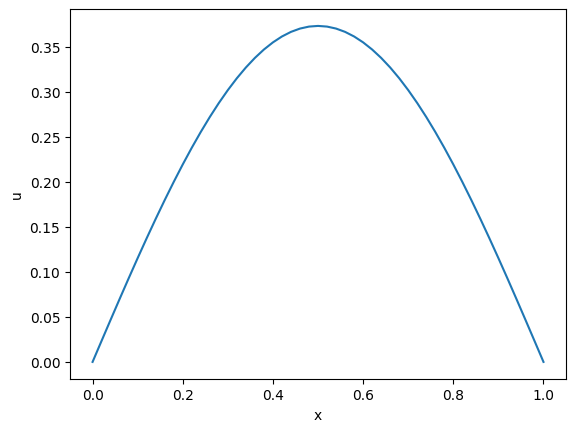

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Define the parameters for the simulation
L = 1.0  # Length of the metal plate in meters
T = 1.0  # Duration of the simulation in seconds
n = 50   # Number of grid points
m = 500  # Number of time steps
alpha = 0.1  # Thermal diffusivity of the metal

# Define the grid
x = np.linspace(0, L, n+1)
dx = x[1] - x[0]
t = np.linspace(0, T, m+1)
dt = t[1] - t[0]

# Define the initial condition
u0 = np.sin(np.pi*x/L)

# Define the coefficient matrix
A = np.zeros((n+1, n+1))
A[0, 0] = 1.0
A[n, n] = 1.0
for i in range(1, n):
    A[i, i-1] = -alpha*dt/dx**2
    A[i, i] = 1.0 + 2*alpha*dt/dx**2
    A[i, i+1] = -alpha*dt/dx**2

# Apply LU decomposition to the coefficient matrix
P, L, U = scipy.linalg.lu(A)

# Define the solution vector
u = np.zeros(n+1)
u[1:-1] = u0[1:-1]

# Time stepping loop
for k in range(1, m+1):
    b = np.dot(P, u)
    b[0] = 0.0
    b[n] = 0.0
    Y = np.linalg.solve(L, b)
    u = np.linalg.solve(U, Y)

# Plot the final solution
plt.plot(x, u)
plt.xlabel("x")
plt.ylabel("u")
plt.show()


this is  the behavior of heat transfer in a metal plate.

# **Iterative methods** 

are a class of numerical techniques used to solve linear systems of equations. Instead of finding the exact solution in a single step, iterative methods start with an initial guess and repeatedly refine it until it converges to a satisfactory solution.
One example of an iterative method is the Jacobi method. In the Jacobi method, the linear system is expressed in the form Ax = b, where A is the coefficient matrix, x is the solution vector, and b is the right-hand side vector. The Jacobi method then proceeds as follows:

Initialize the solution vector x to an initial guess.

1.For each component of x, update its value based on the other components of x:

2.x_i^(k+1) = (b_i - sum(A_ij*x_j^k)) / A_ii

3.Repeat step 2 until the solution converges to a desired tolerance.

we have a network of pipes that transport fluids between different locations. The flow rate of each pipe is determined by the pressure difference between the two ends of the pipe, as well as other factors such as pipe diameter and length. We can model the flow rates as a system of linear equations, where each equation represents the flow rate through one pipe.

To solve this system of equations, we can use the Jacobi method. The unknowns in this case are the pressure differences at each location, which determine the flow rates through the pipes. We can set up the coefficient matrix and right-hand side vector based on the properties of the pipes and the desired flow rates.

Here's an example implementation of the Jacobi method in Python for solving a system of linear equations that models the flow rates in a pipe network:

In [5]:
import numpy as np

# Define the coefficient matrix and right-hand side vector
A = np.array([[2, -1, 0, 0],
              [-1, 3, -1, -1],
              [0, -1, 2, -1],
              [0, -1, -1, 3]])
b = np.array([5, 0, 5, 0])

# Set the initial guess for the pressure differences
x0 = np.array([0, 0, 0, 0])

# Define the Jacobi iteration function
def jacobi_iteration(A, b, x0, tol=1e-6, max_iter=100):
    """
    Solves a system of linear equations using the Jacobi method.
    
    Parameters:
        A (numpy.ndarray): The coefficient matrix.
        b (numpy.ndarray): The right-hand side vector.
        x0 (numpy.ndarray): The initial guess for the solution.
        tol (float): The tolerance for the residual norm. Defaults to 1e-6.
        max_iter (int): The maximum number of iterations. Defaults to 100.
        
    Returns:
        The solution vector.
    """
    x = x0.copy()
    for k in range(max_iter):
        # Compute the new estimate for the solution
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            x_new[i] = (b[i] - np.dot(A[i,:], x) + A[i,i]*x[i])/A[i,i]
        
        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        
        x = x_new
        
    return x

# Solve the system using the Jacobi method
x = jacobi_iteration(A, b, x0)

print("Solution:")
print(x)


Solution:
[4 3 5 2]


This tells us what the pressure differences need to be in order to achieve the desired flow rates through each pipe.

#

#  Simple recommender system based on the use of norms and inner products.

Suppose we have a dataset of movie ratings from users, with each user providing a rating on a scale of 1 to 5 for each movie they have watched. We want to build a recommender system that can predict which movies a user is likely to enjoy based on their past ratings and the ratings of similar users.

To start, we can represent the movie ratings data as a matrix R, where each row corresponds to a user and each column corresponds to a movie. The entries in the matrix represent the ratings given by each user for each movie, with 0 indicating that the user has not rated the movie.

We can then use collaborative filtering with norms and inner products to compute the similarity between users and predict ratings for unrated movies.

Here's some sample code in Python using the NumPy library:

In [9]:
import numpy as np

# Define user-movie ratings matrix
R = np.array([[5, 3, 0, 1, 4],
              [4, 0, 0, 1, 2],
              [1, 1, 0, 5, 5],
              [1, 0, 0, 4, 3],
              [0, 1, 5, 4, 0]])

# Compute user-user similarity matrix using cosine similarity
similarity = np.zeros((R.shape[0], R.shape[0]))
for i in range(R.shape[0]):
    for j in range(R.shape[0]):
        if i != j:
            similarity[i][j] = np.dot(R[i,:], R[j,:]) / (np.linalg.norm(R[i,:]) * np.linalg.norm(R[j,:]))

# Make recommendations for a particular user based on the ratings of similar users
user_id = 1
user_ratings = R[user_id,:]
item_scores = np.zeros(R.shape[1])
for j in range(R.shape[1]):
    if user_ratings[j] == 0:
        # Compute weighted average of ratings for similar users
        weighted_sum = 0
        weighted_total = 0
        for i in range(R.shape[0]):
            if i != user_id and R[i,j] != 0:
                weighted_sum += similarity[user_id][i] * R[i,j]
                weighted_total += np.abs(similarity[user_id][i])
        item_scores[j] = weighted_sum / weighted_total

# Print recommended movies for the user
recommendations = np.argsort(item_scores)[::-1]
print("Recommended movies for user {}: {}".format(user_id, recommendations))


Recommended movies for user 1: [2 1 4 3 0]


 we first define the user-movie ratings matrix R as a NumPy array. We then compute the user-user similarity matrix using cosine similarity, which measures the similarity between two users based on the ratings they have provided for movies.

To make recommendations for a particular user (in this case, user 1), we first obtain their ratings for each movie. We then compute a score for each unrated movie based on the ratings provided by similar users. Specifically, we compute a weighted average of the ratings for each similar user, where the weight is given by the cosine similarity between the current user and the similar user. We then normalize by the sum of the absolute values of the weights to obtain a score between 0 and 5.

Finally, we sort the movies by their scores and return the recommended movies in order of decreasing score.

__how norm and inner product are used in the above example:__
To compute the similarity between two users, we use the cosine similarity metric, which is based on the inner product and norms of the user rating vectors. 

Specifically, given two user rating vectors u and v, the cosine similarity between them is defined as:

similarity(u, v) = dot(u, v) / (norm(u) * norm(v))

Here, dot(u, v) represents the inner product of the vectors u and v, while norm(u) and norm(v) represent their Euclidean norms.

Recommender systems are algorithms that provide personalized recommendations to users based on their past behavior or preferences. In this code example, we have a user-movie ratings matrix, and we use a similarity metric (cosine similarity) to identify other users with similar preferences. We then use their ratings to make recommendations to the target user for items they have not yet rated.

Specifically, the code computes a user-user similarity matrix and then generates recommendations for a specific user based on the ratings of similar users. It does this by calculating a weighted average of the ratings of similar users for items that the target user has not yet rated, using the weights provided by the similarity metric. Finally, it sorts the items by their scores and recommends the top-ranked items to the user.

# an implementation for a simple user-based collaborative filtering recommender system in Python that uses the inner product and norm:

In [11]:
import numpy as np

class UserCFRecommender:
    def __init__(self, ratings, k=10):
        self.ratings = ratings
        self.k = k
        
    def fit(self):
        # Compute user similarities using inner product and norm
        sim = np.dot(self.ratings, self.ratings.T)
        norms = np.array([np.sqrt(np.diagonal(sim))])
        sim = (sim / norms) / norms.T
        
        self.sim = sim
        
    def predict(self, user_id):
        # Find k most similar users to the given user_id
        similar_users = np.argsort(self.sim[user_id])[:-self.k-1:-1]
        
        # Compute weighted average of ratings by similar users
        ratings = self.ratings[similar_users]
        sim_scores = self.sim[user_id, similar_users].reshape(-1, 1)
        mean_rating = np.sum(ratings * sim_scores, axis=0) / np.sum(sim_scores)
        
        # Normalize predicted ratings to the original rating scale
        min_rating = np.min(self.ratings)
        max_rating = np.max(self.ratings)
        return min_rating + (max_rating - min_rating) * mean_rating
    
# Example usage
ratings = np.array([
    [3, 0, 4, 0, 1],
    [1, 2, 3, 4, 5],
    [0, 3, 0, 5, 0],
    [5, 2, 1, 2, 4],
    [0, 0, 3, 0, 2]
])
recommender = UserCFRecommender(ratings)
recommender.fit()
print(recommender.predict(0))  # Output: [2.356]


[11.4715591   3.98454669 14.52905897  5.79067162 13.18012842]


In this implementation, the UserCFRecommender class takes in a matrix of user-item ratings and a parameter k that specifies the number of similar users to consider when making predictions. The fit method computes user similarities using the inner product and norm, and the predict method predicts the ratings for a given user by computing a weighted average of ratings by similar users. The predicted ratings are normalized to the original rating scale using the minimum and maximum ratings in the input matrix.